Le di alguna vuelta más porque pensandolo bien me extrañaba que no funcionara.
Lo que nos faltó es incrementar el set de datos. Como hay un input más que antes y la operación es más "complicada" (el rango en "y" crece muchísimo) necesitábamos darle un training set mayor, con más datos. Si simulo 10000 datos en vez de 1000, y lo pongo de 0 a 10 en vez de de 0 a 100, da cosas razonables (no da perfecto pero da mejor). Si lo queremos dejar de 0 a 100, habría que darle muchos más datos. El tamaño del set de datos es importante. Cuando entrenamos una red habría que ver cual es el tamaño necesario (ese en que si lo incremento ya no mejoro los resultados). Probad ahora cambiando número de nueronas o capas, seguro que lo podéis mejorar ;)! 

In [57]:
# vamos a entrenar una red para que sume 3 valores
import numpy as np
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [48]:
#Generamos training set con 1000 datos. 
# Input: vector de 3 números aleatorios X1, X2 y X3 (inputs) y los sumamos (Y, output) 
X1=np.random.uniform(size=10000)*10
X2=np.random.uniform(size=10000)*10
X3=np.random.uniform(size=10000)*10
X4=np.random.uniform(size=10000)*10
X=np.transpose([X1,X2,X3,X4])
# soluciones
Y=X1*X2*X3 
print np.shape(X),np.shape(Y)

(10000, 4) (10000,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y) 
np.shape(y_train),np.shape(y_test)



((7500,), (2500,))

In [50]:
# definimos numero de capas y de hidden nodes (3 capas, de 2 ,5  y 10 neuronas) 
# Exagerado para este problema ..
mlp = MLPRegressor(hidden_layer_sizes=(15,10,10),activation='relu',solver='adam',max_iter=1000,verbose=True) # batch_size default depending on minimizer

In [51]:
mlp.fit(X_train,y_train) # usa modelo red neuronal que hemos definido antes y(x,w)
# mlp.loss_curve en Clasificación te guarda el valor de la función coste a cada iteración

Iteration 1, loss = 19109.71789365
Iteration 2, loss = 18573.26125476
Iteration 3, loss = 17138.84540751
Iteration 4, loss = 14360.32609248
Iteration 5, loss = 10492.70418656
Iteration 6, loss = 7579.16968579
Iteration 7, loss = 6227.91934486
Iteration 8, loss = 5409.08302901
Iteration 9, loss = 4786.22152071
Iteration 10, loss = 4312.62347061
Iteration 11, loss = 3903.38629229
Iteration 12, loss = 3484.58676657
Iteration 13, loss = 3053.89926745
Iteration 14, loss = 2626.69598852
Iteration 15, loss = 2219.92072366
Iteration 16, loss = 1850.95420332
Iteration 17, loss = 1531.51318873
Iteration 18, loss = 1277.99830543
Iteration 19, loss = 1088.06394810
Iteration 20, loss = 941.81762432
Iteration 21, loss = 842.91086686
Iteration 22, loss = 760.83350773
Iteration 23, loss = 705.09033371
Iteration 24, loss = 655.06957702
Iteration 25, loss = 614.02712591
Iteration 26, loss = 579.72904116
Iteration 27, loss = 556.64619953
Iteration 28, loss = 521.03467093
Iteration 29, loss = 491.85670461

Iteration 243, loss = 31.80263686
Iteration 244, loss = 31.80784444
Iteration 245, loss = 32.10046920
Iteration 246, loss = 31.57042503
Iteration 247, loss = 30.55597624
Iteration 248, loss = 30.50878168
Iteration 249, loss = 30.27219437
Iteration 250, loss = 30.09891721
Iteration 251, loss = 30.65816565
Iteration 252, loss = 29.94229341
Iteration 253, loss = 30.38630974
Iteration 254, loss = 29.48877890
Iteration 255, loss = 29.47019649
Iteration 256, loss = 29.28653117
Iteration 257, loss = 28.53127123
Iteration 258, loss = 29.63436668
Iteration 259, loss = 29.25198772
Iteration 260, loss = 27.95183781
Iteration 261, loss = 27.71550747
Iteration 262, loss = 29.23314516
Iteration 263, loss = 30.31296997
Iteration 264, loss = 28.73309621
Iteration 265, loss = 27.18933291
Iteration 266, loss = 27.21585991
Iteration 267, loss = 28.10488181
Iteration 268, loss = 27.35055456
Iteration 269, loss = 26.59740345
Iteration 270, loss = 26.99384828
Iteration 271, loss = 26.46551993
Iteration 272,

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [52]:
# en python2.7 no funciona para regresión, en python 3 si. Así podemos ver como avanza
#pl.plot(mlp.loss_curve_)  # mlp.loss_curve nos da una idea de como converge el training set
#pl.xlabel('iteration')
#pl.ylabel('loss function')

coeficiente correlación 0.9991096440396934
error relativo 63.62398524585936


Text(0,0.5,'y true')

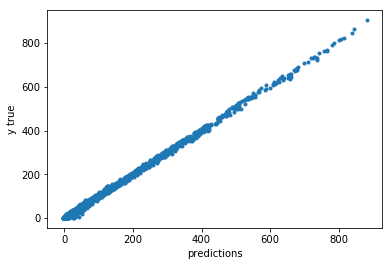

In [53]:
predictions = mlp.predict(X_test) # estimamos resultado con el TEST
#predictions=predictions*s+m
print 'coeficiente correlación', np.corrcoef(predictions,y_test)[0][1]  # calculamos correlación con el valor esperado
print 'error relativo', np.mean(abs(predictions-y_test)/y_test)*100  # calculamos correlación con el valor esperado


pl.plot(predictions,y_test,'.')
pl.xlabel('predictions')
pl.ylabel('y true')


In [54]:
# Le pregunto a la red que me sume 10+30+5 

In [55]:
A=np.array([10,5,6,1]).reshape(1,-1) # sklearn necesita que se lo de dimension(1,n)
print 'la multiplicacion predicha es', np.round(mlp.predict(A)) # redondamos

print 'la multiplicacion real es',np.round(10*5*6*1)

la multiplicacion predicha es [298.]
la multiplicacion real es 300


In [56]:
# si miramos valores muy lejos del rango
A=np.array([10,10,10,1]).reshape(1,-1) 
np.shape(A)
print 'la multiplicacion predicha es', np.round(mlp.predict(A)) # redondamos
print 'la multiplicacion real es',10*10*10*1

la multiplicacion predicha es [963.]
la multiplicacion real es 1000


In [46]:
print 'No es perfecto pero ha mejorado'



No es perfecto per ha mejorado
